In [1]:
import numpy as np
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score, accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

2024-04-08 15:26:34.289799: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-08 15:26:34.583143: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 15:26:35.339420: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Utility functions to load in the data
dataset = np.load("sc-agg-f16.npz")

# Create a reproducible sample of rows from the given set
def generate_sample(size_per, set_name="train_patients", random_state=42):
    # Set up the random state & the row storage
    r = np.random.RandomState(random_state)
    rows = []
    
    # Loop through each person in the named set and select that number of rows, randomly
    for entry in dataset[set_name]:
        entry_set = dataset[entry]
        to_get = size_per if type(size_per) is int else int(size_per * entry_set.shape[0])
        selection = r.choice(range(entry_set.shape[0]), size=to_get, replace=False)
        rows.extend(entry_set[selection])
    
    # Return the sample and the labels
    return np.array(rows, dtype=float), dataset["labels"]

# Dependent variable column
DEP_COL = "_HYPNO-mode"

## Try TSNE (2 components)

Finished one...
Finished one...
Finished one...
Finished one...
Finished one...
Finished one...
Finished one...


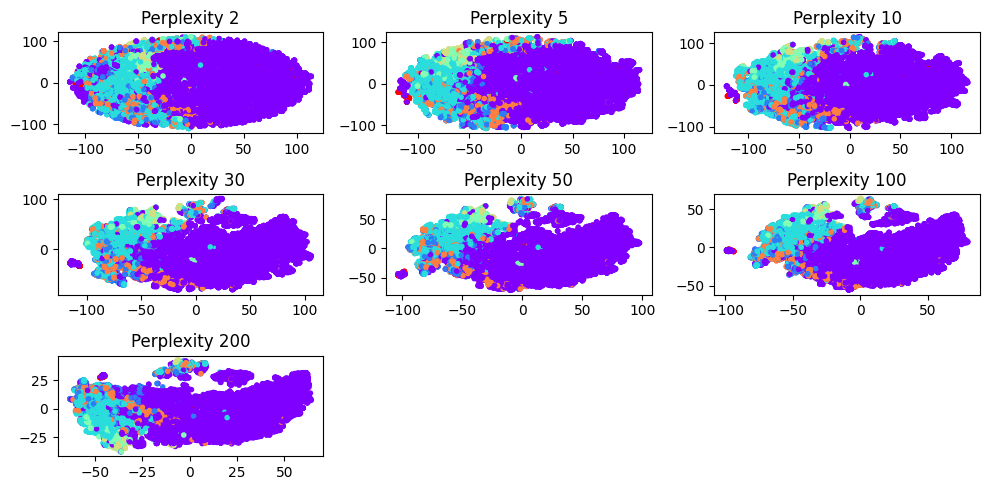

In [29]:
# Function to loop through the data and make the plot as described
def plot_perplexities(X, Y):
    # Loop through all the perplexities given
    perplexities = [2, 5, 10, 30, 50, 100, 200]
    plt.figure(figsize=(10, 5))
    for i, perp in enumerate(perplexities):
        plt.subplot(3, 3, i+1)
        proj = TSNE(n_components=2, perplexity=perp, n_jobs=1)
        X_transformed = proj.fit_transform(X)
        plt.title(f"Perplexity {perp}")
        plt.scatter(*X_transformed.T, c=Y, cmap="rainbow", marker=".")
        print("Finished one...")
    plt.tight_layout()
    plt.show()


# Get a sample, replace NaN with 6
sample, labels = generate_sample(0.1)
dep_col_idx = np.where(labels == DEP_COL)[0]
X = np.delete(sample, dep_col_idx, axis=1)
y = sample[:, dep_col_idx]
y[np.isnan(y)] = 6
    
# Create two clusters
plot_perplexities(X, y)

## Try unsupervised UMAP (2 components)

In [14]:
# Get a sample, replace NaN with 6
sample, labels = generate_sample(0.1)
dep_col_idx = np.where(labels == DEP_COL)[0]
X = np.delete(sample, dep_col_idx, axis=1)
y = sample[:, dep_col_idx]
y[np.isnan(y)] = 6

Finished one...


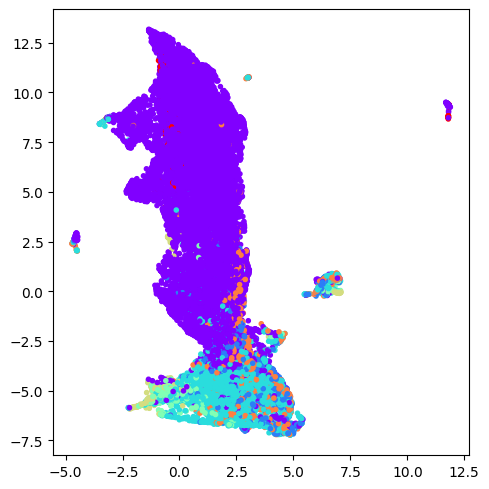

In [40]:
# Function to loop through the data and make the plot as described
def plot_perplexities(X, Y):
    # Loop through all the perplexities given
    #perplexities = [2, 5, 10, 30, 50, 100, 200]
    plt.figure(figsize=(5, 5))
    #for i, perp in enumerate(perplexities):
        #plt.subplot(2, 3, i+1)
    proj = UMAP(n_components=2, n_jobs=-1, n_neighbors=50)
    X_transformed = proj.fit_transform(X)
    # plt.title(f"Perplexity {perp}")
    plt.scatter(*X_transformed.T, c=Y, cmap="rainbow", marker=".")
    print("Finished one...")
    plt.tight_layout()
    plt.show()

# Create two clusters
plot_perplexities(X, y)

## Try supervised UMAP (2 components)

Finished one...


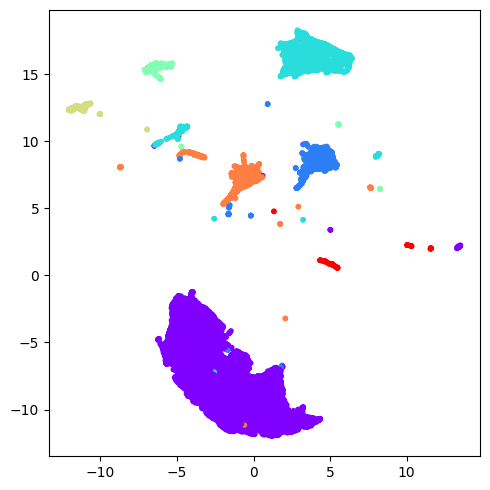

In [41]:
# Function to loop through the data and make the plot as described
def plot_perplexities(X, Y):
    # Loop through all the perplexities given
    #perplexities = [2, 5, 10, 30, 50, 100, 200]
    plt.figure(figsize=(5, 5))
    #for i, perp in enumerate(perplexities):
        #plt.subplot(2, 3, i+1)
    proj = UMAP(n_components=2, n_jobs=-1, n_neighbors=50)
    X_transformed = proj.fit_transform(X, Y)
    # plt.title(f"Perplexity {perp}")
    plt.scatter(*X_transformed.T, c=Y, cmap="rainbow", marker=".")
    print("Finished one...")
    plt.tight_layout()
    plt.show()

# Create two clusters
plot_perplexities(X, y)

## Test supervised UMAP in 3D

Finished one...


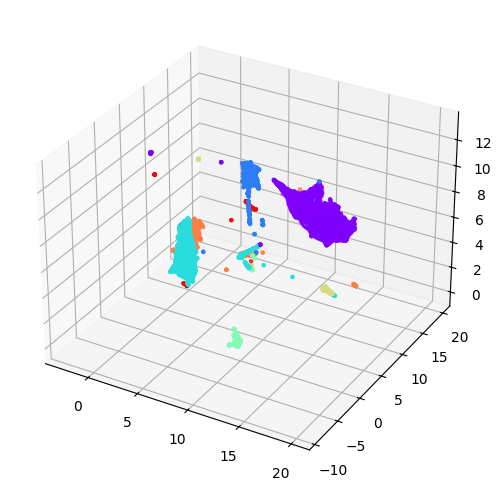

In [8]:
# Get a sample, replace NaN with 6
sample, labels = generate_sample(0.1)
dep_col_idx = np.where(labels == DEP_COL)[0]
X = np.delete(sample, dep_col_idx, axis=1)
y = sample[:, dep_col_idx]
y[np.isnan(y)] = 6

# Function to loop through the data and make the plot as described
def plot_perplexities(X, Y):
    # Loop through all the perplexities given
    #perplexities = [2, 5, 10, 30, 50, 100, 200]
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(projection='3d')
    #for i, perp in enumerate(perplexities):
        #plt.subplot(2, 3, i+1)
    proj = UMAP(n_components=3, n_jobs=-1, n_neighbors=50)
    X_transformed = proj.fit_transform(X, Y)
    # plt.title(f"Perplexity {perp}")
    ax.scatter(*X_transformed.T, c=Y, cmap="rainbow", marker=".")
    print("Finished one...")
    plt.tight_layout()
    plt.show()

# Create two clusters
plot_perplexities(X, y)

## Test basic K-Means Classification on 64 dimensions

In [3]:
sample, labels = generate_sample(1., set_name="train_patients")
dep_col_idx = np.where(labels == DEP_COL)[0]
X_train = np.delete(sample, dep_col_idx, axis=1)
y_train = sample[:, dep_col_idx]
y_train[np.isnan(y_train)] = 6

sample, labels = generate_sample(1., set_name="test_patients")
dep_col_idx = np.where(labels == DEP_COL)[0]
X_test = np.delete(sample, dep_col_idx, axis=1)
y_test = sample[:, dep_col_idx]
y_test[np.isnan(y_test)] = 6

In [15]:
clf = RandomForestClassifier(n_jobs=-1, criterion="gini", max_depth=7, max_features=0.5, min_samples_leaf=10, n_estimators=60)
clf.fit(X_train, y_train)
print("Fitting finished...")
y_pred = clf.predict(X_test)
y_true = y_test.ravel()
print("Fowlkes-Meadows:", fowlkes_mallows_score(y_true, y_pred))
print("Homogeneity:", homogeneity_score(y_true, y_pred))
print("Completeness:", completeness_score(y_true, y_pred))
print("V Measure:", v_measure_score(y_true, y_pred))
print("Adjusted Rand:", adjusted_rand_score(y_true, y_pred))
print("Adjusted Mutual:", adjusted_mutual_info_score(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))

Fitting finished...
Fowlkes-Meadows: 0.8960477948073494
Homogeneity: 0.49492799010950195
Completeness: 0.6023214043037521
V Measure: 0.5433691256515089
Adjusted Rand: 0.7741413205563791
Adjusted Mutual: 0.5433004893567712
Accuracy: 0.8565800946686597


## These values are very poor - almost random, in fact.

## Pipeline UMAP --> KMeans parameter search

In [42]:
# Get a smaller portion of the data for faster fitting
sample, labels = generate_sample(0.05)
dep_col_idx = np.where(labels == DEP_COL)[0]
X = np.delete(sample, dep_col_idx, axis=1)
y = sample[:, dep_col_idx]
y[np.isnan(y)] = 6

In [63]:
# Set up the pipeline
umap = UMAP(n_jobs=-1)
gmm = KMeans(n_clusters=len(np.unique(y)), n_init="auto")
pipe = Pipeline([("umap", umap), ("km", gmm)])

# Set up the parameter values to explore, and do the grid search
param_grid = {
    "umap__n_neighbors": range(10,40,5),
    "umap__min_dist": [0., 0.5, 1.0],
    "umap__n_components": range(2,10,2),
    "umap__learning_rate": [10., 100., 1000.]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=10, scoring="adjusted_rand_score", cv=StratifiedKFold(n_splits=3))
search.fit(X, y.ravel())

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV 1/3; 115/216] START umap__learning_rate=100.0, umap__min_dist=0.5, umap__n_components=8, umap__n_neighbors=10
[CV 1/3; 115/216] END umap__learning_rate=100.0, umap__min_dist=0.5, umap__n_components=8, umap__n_neighbors=10;, score=0.862 total time=  49.3s
[CV 1/3; 140/216] START umap__learning_rate=100.0, umap__min_dist=1.0, umap__n_components=8, umap__n_neighbors=15
[CV 1/3; 140/216] END umap__learning_rate=100.0, umap__min_dist=1.0, umap__n_components=8, umap__n_neighbors=15;, score=0.861 total time=  18.3s
[CV 2/3; 145/216] START umap__learning_rate=1000.0, umap__min_dist=0.0, umap__n_components=2, umap__n_neighbors=10
[CV 2/3; 145/216] END umap__learning_rate=1000.0, umap__min_dist=0.0, umap__n_components=2, umap__n_neighbors=10;, score=0.697 total time=  12.7s
[CV 3/3; 148/216] START umap__learning_rate=1000.0, umap__min_dist=0.0, umap__n_components=2, umap__n_neighbors=25
[CV 3/3; 148/216] END umap__learning_rate=1

/home/ej/.virtualenvs/Generic/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/3; 114/216] START umap__learning_rate=100.0, umap__min_dist=0.5, umap__n_components=6, umap__n_neighbors=35
[CV 1/3; 114/216] END umap__learning_rate=100.0, umap__min_dist=0.5, umap__n_components=6, umap__n_neighbors=35;, score=0.543 total time=  56.2s
[CV 2/3; 142/216] START umap__learning_rate=100.0, umap__min_dist=1.0, umap__n_components=8, umap__n_neighbors=25
[CV 2/3; 142/216] END umap__learning_rate=100.0, umap__min_dist=1.0, umap__n_components=8, umap__n_neighbors=25;, score=0.513 total time=  19.1s
[CV 1/3; 146/216] START umap__learning_rate=1000.0, umap__min_dist=0.0, umap__n_components=2, umap__n_neighbors=15
[CV 1/3; 146/216] END umap__learning_rate=1000.0, umap__min_dist=0.0, umap__n_components=2, umap__n_neighbors=15;, score=0.695 total time=  14.1s
[CV 2/3; 151/216] START umap__learning_rate=1000.0, umap__min_dist=0.0, umap__n_components=4, umap__n_neighbors=10
[CV 2/3; 151/216] END umap__learning_rate=1000.0, umap__min_dist=0.0, umap__n_components=4, umap__n_neighb

/home/ej/.virtualenvs/Generic/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('umap', UMAP()),
                                       ('km',
                                        KMeans(n_clusters=7, n_init='auto'))]),
             n_jobs=-1,
             param_grid={'umap__learning_rate': [10.0, 100.0, 1000.0],
                         'umap__min_dist': [0.0, 0.5, 1.0],
                         'umap__n_components': range(2, 10, 2),
                         'umap__n_neighbors': range(10, 40, 5)},
             scoring='adjusted_rand_score', verbose=10)

In [64]:
print("Best parameters:", search.best_params_)
y_pred = search.predict(X)
y_true = y.ravel()
print("Fowlkes-Mallows:", fowlkes_mallows_score(y_true, y_pred))
print("Homogeneity:", homogeneity_score(y_true, y_pred))
print("Completeness:", completeness_score(y_true, y_pred))
print("V Measure:", v_measure_score(y_true, y_pred))
print("Adjusted Rand:", adjusted_rand_score(y_true, y_pred))
print("Adjusted Mutual:", adjusted_mutual_info_score(y_true, y_pred))

Best parameters: {'umap__learning_rate': 100.0, 'umap__min_dist': 1.0, 'umap__n_components': 2, 'umap__n_neighbors': 10}
Fowlkes-Mallows: 0.603992747214252
Homogeneity: 0.33957088047182943
Completeness: 0.3208594115895986
V Measure: 0.3299500771264411
Adjusted Rand: 0.3092241870619837
Adjusted Mutual: 0.3288913299720378


## Best parameters found to maximize adjusted_rand_score:
```
Best parameters: {'umap__learning_rate': 100.0, 'umap__min_dist': 0.0, 'umap__n_components': 6, 'umap__n_neighbors': 20}
Fowlkes-Mallows: 0.6481892252683441
Homogeneity: 0.5525793305383553
Completeness: 0.5165435738791432
V Measure: 0.5339541432863436
Adjusted Rand: 0.3847296668685917
Adjusted Mutual: 0.5333875149797199
```

## Best parameters found to maximize completeness_score:
```
Best parameters: {'umap__learning_rate': 1000.0, 'umap__min_dist': 0.0, 'umap__n_components': 4, 'umap__n_neighbors': 15}
Fowlkes-Mallows: 0.7054429184888638
Homogeneity: 0.0011535549419755642
Completeness: 0.046222318595596
V Measure: 0.0022509340752623055
Adjusted Rand: -0.0016620640931085662
Adjusted Mutual: 0.0001592057867800833
```

## Best paramters for fowlkes_mallows:
```
Best parameters: {'umap__learning_rate': 1000.0, 'umap__min_dist': 1.0, 'umap__n_components': 2, 'umap__n_neighbors': 35}
Fowlkes-Mallows: 0.4011109129605493
Homogeneity: 0.07218694700711165
Completeness: 0.05379004062172326
V Measure: 0.0616452081440619
Adjusted Rand: 0.01600816204090653
Adjusted Mutual: 0.060255602850525565
```

## Weirdly, choosing to maximize adjusted_rand_score provides the best results across all metrics.

## Now, based on our 2-D plot of the components from supervised UMAP, it would make more sense to use GMM then it would to use KMeans.

In [17]:
# Get a smaller portion of the data for faster fitting
sample, labels = generate_sample()
dep_col_idx = np.where(labels == DEP_COL)[0]
X = np.delete(sample, dep_col_idx, axis=1)
y = sample[:, dep_col_idx]
y[np.isnan(y)] = 6

# Set up the pipeline
umap = UMAP(n_jobs=-1, min_dist=1.)
gmm = GaussianMixture(n_components=len(np.unique(y)), )
pipe = Pipeline([("umap", umap), ("gmm", gmm)])

# Set up the parameter values to explore, and do the grid search
param_grid = {
    # "umap__n_neighbors": range(7,11,1),
    # "umap__n_components": range(2, 5, 1),
    # "umap__learning_rate": [135., 140., 137.5],
    'umap__learning_rate': [140.0], 'umap__n_components': [4], 'umap__n_neighbors': [9]
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1, verbose=2, scoring="adjusted_rand_score", cv=StratifiedKFold(n_splits=3))
search.fit(X, y.ravel())

Fitting 3 folds for each of 1 candidates, totalling 3 fits


2024-04-08 14:40:46.545875: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-08 14:40:46.545884: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-04-08 14:40:46.546643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/ej/.virtualenvs/Generic/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/ej/.virtualenvs/Generic/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/ej

KeyboardInterrupt: 

In [17]:
print("Best parameters:", search.best_params_)
y_pred = search.predict(X)
y_true = y.ravel()
print("Fowlkes-Mallows:", fowlkes_mallows_score(y_true, y_pred))
print("Homogeneity:", homogeneity_score(y_true, y_pred))
print("Completeness:", completeness_score(y_true, y_pred))
print("V Measure:", v_measure_score(y_true, y_pred))
print("Adjusted Rand:", adjusted_rand_score(y_true, y_pred))
print("Adjusted Mutual:", adjusted_mutual_info_score(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))
y_pred = search.predict(X_test)
y_true = y_test.ravel()
print("Fowlkes-Mallows:", fowlkes_mallows_score(y_true, y_pred))
print("Homogeneity:", homogeneity_score(y_true, y_pred))
print("Completeness:", completeness_score(y_true, y_pred))
print("V Measure:", v_measure_score(y_true, y_pred))
print("Adjusted Rand:", adjusted_rand_score(y_true, y_pred))
print("Adjusted Mutual:", adjusted_mutual_info_score(y_true, y_pred))
print("Adjusted Mutual:", accuracy_score(y_true, y_pred))

Best parameters: {'umap__learning_rate': 140.0, 'umap__n_components': 4, 'umap__n_neighbors': 9}
Fowlkes-Mallows: 0.6967650094133425
Homogeneity: 0.04069607419470739
Completeness: 0.09512525981234211
V Measure: 0.05700466218234854
Adjusted Rand: 0.1480123505606944
Adjusted Mutual: 0.05677849671358074


In [9]:
# Get a smaller portion of the data for faster fitting
sample, labels = generate_sample(1.)
dep_col_idx = np.where(labels == DEP_COL)[0]
X = np.delete(sample, dep_col_idx, axis=1)
y = sample[:, dep_col_idx]
y[np.isnan(y)] = 6

# Set up the pipeline
umap = UMAP(n_components=3, n_jobs=-1, n_neighbors=50)
gmm = GaussianMixture(n_components=len(np.unique(y)))
pipe = Pipeline([("umap", umap), ("gmm", gmm)])

# Fit the pipeline
pipe.fit(X, y.ravel())
print("Finished.")

Finished.


In [10]:
y_pred = pipe.predict(X)
y_true = y.ravel()
print("Fowlkes-Mallows:", fowlkes_mallows_score(y_true, y_pred))
print("Homogeneity:", homogeneity_score(y_true, y_pred))
print("Completeness:", completeness_score(y_true, y_pred))
print("V Measure:", v_measure_score(y_true, y_pred))
print("Adjusted Rand:", adjusted_rand_score(y_true, y_pred))
print("Adjusted Mutual:", adjusted_mutual_info_score(y_true, y_pred))

Fowlkes-Mallows: 0.5870219250755518
Homogeneity: 0.8138922409508813
Completeness: 0.4805283568193671
V Measure: 0.6042831856134863
Adjusted Rand: 0.34342705661821016
Adjusted Mutual: 0.6042585394563793


In [6]:
sample, labels = generate_sample(1., set_name="test_patients")
dep_col_idx = np.where(labels == DEP_COL)[0]
Xt = np.delete(sample, dep_col_idx, axis=1)
yt = sample[:, dep_col_idx]
yt[np.isnan(yt)] = 6

In [11]:
yt_pred = pipe.predict(Xt)
yt_true = yt.ravel()
print("Fowlkes-Mallows:", fowlkes_mallows_score(yt_true, yt_pred))
print("Homogeneity:", homogeneity_score(yt_true, yt_pred))
print("Completeness:", completeness_score(yt_true, yt_pred))
print("V Measure:", v_measure_score(yt_true, yt_pred))
print("Adjusted Rand:", adjusted_rand_score(yt_true, yt_pred))
print("Adjusted Mutual:", adjusted_mutual_info_score(yt_true, yt_pred))

Fowlkes-Mallows: 0.5142566497473915
Homogeneity: 0.5025869868123765
Completeness: 0.29446724965966026
V Measure: 0.3713559277382213
Adjusted Rand: 0.25082840478975893
Adjusted Mutual: 0.37129167087880305


## First grid search:
```
param_grid = {
    "umap__n_neighbors": range(10,40,10),
    "umap__min_dist": [0., 0.5, 1.0],
    "umap__n_components": range(2,6,2),
    "umap__learning_rate": [10., 100., 1000.],
    "gmm__covariance_type": ["full", "tied", "diag", "spherical"]
}
Best parameters: {'gmm__covariance_type': 'full', 'umap__learning_rate': 100.0, 'umap__min_dist': 1.0, 'umap__n_components': 4, 'umap__n_neighbors': 10}
Fowlkes-Mallows: 0.6832696911831514
Homogeneity: 0.6364768263430861
Completeness: 0.4298748125619051
V Measure: 0.5131615996861759
Adjusted Rand: 0.4640930062006592
Adjusted Mutual: 0.5124880259070925
```

## Second grid search:
```
param_grid = {
    "umap__n_neighbors": range(10,15,2),
    "umap__min_dist": [1., 2., 3.0],
    "umap__n_components": range(4,9,2),
    "umap__learning_rate": [90., 100., 110.],
    "gmm__covariance_type": ["full"]
}
Best parameters: {'gmm__covariance_type': 'full', 'umap__learning_rate': 110.0, 'umap__min_dist': 1.0, 'umap__n_components': 4, 'umap__n_neighbors': 10}
Fowlkes-Mallows: 0.6499163248374751
Homogeneity: 0.5851334593521462
Completeness: 0.38425121043627186
V Measure: 0.4638782663478666
Adjusted Rand: 0.4183762735536213
Adjusted Mutual: 0.4631501541794739
```

## Third grid search:
```
param_grid = {
    "umap__n_neighbors": range(8,13,1),
    "umap__min_dist": [1., 1.5, 1.25, 1.1],
    "umap__n_components": range(3, 6, 1),
    "umap__learning_rate": [110., 120., 130., 140.]
}
Best parameters: {'umap__learning_rate': 130.0, 'umap__min_dist': 1.0, 'umap__n_components': 3, 'umap__n_neighbors': 9}
Fowlkes-Mallows: 0.6089274125930267
Homogeneity: 0.5004602787884829
Completeness: 0.31839555318465734
V Measure: 0.38918774487529956
Adjusted Rand: 0.3647928814111105
Adjusted Mutual: 0.3883764813103453
```

## Fourth grid search:
```
param_grid = {
    "umap__n_neighbors": range(8,11,1),
    "umap__min_dist": [1., 1.05, 0.95],
    "umap__n_components": range(2, 5, 1),
    "umap__learning_rate": [125., 130., 135.]
}
Best parameters: {'umap__learning_rate': 135.0, 'umap__min_dist': 1.0, 'umap__n_components': 2, 'umap__n_neighbors': 9}
Fowlkes-Mallows: 0.6579762424433955
Homogeneity: 0.5009495640634709
Completeness: 0.3800462241223665
V Measure: 0.43220181719622025
Adjusted Rand: 0.41876820549169064
Adjusted Mutual: 0.43178064023673446
```

## Fifth grid search:
```
param_grid = {
    "umap__n_neighbors": range(8,11,1),
    "umap__min_dist": [1.],
    "umap__n_components": range(2, 5, 1),
    "umap__learning_rate": [135., 150., 170., 200.]
}
Best parameters: {'umap__learning_rate': 135.0, 'umap__min_dist': 1.0, 'umap__n_components': 2, 'umap__n_neighbors': 8}
Fowlkes-Mallows: 0.5288927787437224
Homogeneity: 0.5244351425709536
Completeness: 0.3219617652957745
V Measure: 0.3989808155392549
Adjusted Rand: 0.2677677721947461
Adjusted Mutual: 0.3985914884358371
```

## Sixth grid search (half of the dataset):
```
param_grid = {
    "umap__n_neighbors": range(7,11,1),
    "umap__n_components": range(2, 5, 1),
    "umap__learning_rate": [135., 140., 137.5]
}
Best parameters: {'umap__learning_rate': 140.0, 'umap__n_components': 4, 'umap__n_neighbors': 9}
Fowlkes-Mallows: 0.6967650094133425
Homogeneity: 0.04069607419470739
Completeness: 0.09512525981234211
V Measure: 0.05700466218234854
Adjusted Rand: 0.1480123505606944
Adjusted Mutual: 0.05677849671358074
```

In [5]:
# Set up the pipeline
umap = UMAP(n_jobs=-1, n_components=8, n_neighbors=60, verbose=10, init="pca", n_epochs=100, target_weight=.95)
rfc = RandomForestClassifier(criterion="gini", max_depth=7, max_features=.5, min_samples_leaf=10, n_estimators=60)
pipe = Pipeline([("umap", umap), ("rfc", rfc)])

# Set up the parameter values to explore, and do the grid search
pipe.fit(X_train, y_train)

print("Fitting complete...")
y_pred = pipe.predict(X_train)
y_true = y_train.ravel()
print("Fowlkes-Mallows:", fowlkes_mallows_score(y_true, y_pred))
print("Homogeneity:", homogeneity_score(y_true, y_pred))
print("Completeness:", completeness_score(y_true, y_pred))
print("V Measure:", v_measure_score(y_true, y_pred))
print("Adjusted Rand:", adjusted_rand_score(y_true, y_pred))
print("Adjusted Mutual:", adjusted_mutual_info_score(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Test set:")
y_pred = pipe.predict(X_test)
y_true = y_test.ravel()
print("Fowlkes-Mallows:", fowlkes_mallows_score(y_true, y_pred))
print("Homogeneity:", homogeneity_score(y_true, y_pred))
print("Completeness:", completeness_score(y_true, y_pred))
print("V Measure:", v_measure_score(y_true, y_pred))
print("Adjusted Rand:", adjusted_rand_score(y_true, y_pred))
print("Adjusted Mutual:", adjusted_mutual_info_score(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))

UMAP(init='pca', n_components=8, n_epochs=100, n_neighbors=60, target_weight=0.95, verbose=10)
Mon Apr  8 14:52:37 2024 Construct fuzzy simplicial set
Mon Apr  8 14:52:37 2024 Finding Nearest Neighbors
Mon Apr  8 14:52:37 2024 Building RP forest with 28 trees
Mon Apr  8 14:52:41 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	Stopping threshold met -- exiting after 2 iterations
Mon Apr  8 14:53:20 2024 Finished Nearest Neighbor Search
Mon Apr  8 14:53:25 2024 Construct embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
Mon Apr  8 14:54:01 2024 Finished embedding
Fitting complete...
Fowlkes-Mallows: 0.9978706104828331
Homogeneity: 0.9845176215223242
Completeness: 0.987560544780154
V Measure: 0.9860367355308174
Adjusted Rand: 0.9957226702274771
Adjusted Mutual: 0.9860355598866901
Accuracy: 0.9981292251182056
Test set:
Mon Apr  8 14:54:38 2024 Worst tree score: 0.97565062
Mon Apr  8 14:54:38 2024 Mean tree score: 0.97671789
Mon Apr  8 14:54:38 2024 Best tree score: 0.97777051
Mon Apr  8 14:54:40 2024 Forward diversification reduced edges from 12283680 to 1716460
Mon Apr  8 14:54:42 2024 Reverse diversification reduced edges from 1716460 to 1716460
Mon Apr  8 14:54:44 2024 Degree pruning reduced edges from 2004

Epochs completed:   0%|            0/33 [00:00]

	completed  0  /  33 epochs
	completed  3  /  33 epochs
	completed  6  /  33 epochs
	completed  9  /  33 epochs
	completed  12  /  33 epochs
	completed  15  /  33 epochs
	completed  18  /  33 epochs
	completed  21  /  33 epochs
	completed  24  /  33 epochs
	completed  27  /  33 epochs
	completed  30  /  33 epochs
Fowlkes-Mallows: 0.8887304633287586
Homogeneity: 0.5246713282674931
Completeness: 0.5269801360149596
V Measure: 0.5258231977496548
Adjusted Rand: 0.7756034816301509
Adjusted Mutual: 0.5257576800479481
Accuracy: 0.8443883906327853


In [4]:
# Set up the pipeline
umap = UMAP(n_jobs=-1, n_components=3, n_neighbors=60, verbose=10, init="pca", n_epochs=100, target_weight=.95)
rfc = RandomForestClassifier(criterion="gini", max_depth=7, max_features=.5, min_samples_leaf=10, n_estimators=60)
pipe = Pipeline([("umap", umap), ("rfc", rfc)])

# Set up the parameter values to explore, and do the grid search
pipe.fit(X_train, y_train)

print("Fitting complete...")
y_pred = pipe.predict(X_train)
y_true = y_train.ravel()
print("Fowlkes-Mallows:", fowlkes_mallows_score(y_true, y_pred))
print("Homogeneity:", homogeneity_score(y_true, y_pred))
print("Completeness:", completeness_score(y_true, y_pred))
print("V Measure:", v_measure_score(y_true, y_pred))
print("Adjusted Rand:", adjusted_rand_score(y_true, y_pred))
print("Adjusted Mutual:", adjusted_mutual_info_score(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Test set:")
y_pred = pipe.predict(X_test)
y_true = y_test.ravel()
print("Fowlkes-Mallows:", fowlkes_mallows_score(y_true, y_pred))
print("Homogeneity:", homogeneity_score(y_true, y_pred))
print("Completeness:", completeness_score(y_true, y_pred))
print("V Measure:", v_measure_score(y_true, y_pred))
print("Adjusted Rand:", adjusted_rand_score(y_true, y_pred))
print("Adjusted Mutual:", adjusted_mutual_info_score(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))

UMAP(init='pca', n_components=3, n_epochs=100, n_neighbors=60, target_weight=0.95, verbose=10)
Mon Apr  8 15:27:05 2024 Construct fuzzy simplicial set
Mon Apr  8 15:27:05 2024 Finding Nearest Neighbors
Mon Apr  8 15:27:05 2024 Building RP forest with 28 trees
Mon Apr  8 15:27:09 2024 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	Stopping threshold met -- exiting after 2 iterations
Mon Apr  8 15:27:47 2024 Finished Nearest Neighbor Search
Mon Apr  8 15:27:53 2024 Construct embedding


Epochs completed:   0%|            0/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs
Mon Apr  8 15:28:25 2024 Finished embedding
Fitting complete...
Fowlkes-Mallows: 0.9975432581512039
Homogeneity: 0.9819872305181153
Completeness: 0.98556747050407
V Measure: 0.9837740931382861
Adjusted Rand: 0.9950634929029322
Adjusted Mutual: 0.9837727266066711
Accuracy: 0.9977628853893947
Test set:
Mon Apr  8 15:28:47 2024 Worst tree score: 0.97616838
Mon Apr  8 15:28:47 2024 Mean tree score: 0.97696473
Mon Apr  8 15:28:47 2024 Best tree score: 0.97800496
Mon Apr  8 15:28:48 2024 Forward diversification reduced edges from 12283680 to 1716469
Mon Apr  8 15:28:51 2024 Reverse diversification reduced edges from 1716469 to 1716469
Mon Apr  8 15:28:53 2024 Degree pruning reduced edges from 20049

Epochs completed:   0%|            0/33 [00:00]

	completed  0  /  33 epochs
	completed  3  /  33 epochs
	completed  6  /  33 epochs
	completed  9  /  33 epochs
	completed  12  /  33 epochs
	completed  15  /  33 epochs
	completed  18  /  33 epochs
	completed  21  /  33 epochs
	completed  24  /  33 epochs
	completed  27  /  33 epochs
	completed  30  /  33 epochs
Fowlkes-Mallows: 0.8888205017082846
Homogeneity: 0.5234849143053855
Completeness: 0.5284918796900252
V Measure: 0.5259764814770845
Adjusted Rand: 0.775233427829703
Adjusted Mutual: 0.5259107911597786
Accuracy: 0.8447620827105132
